Team Jedward Datathon project!

In [18]:
#import values
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [19]:
#importing csv files to dataframes
customers_df = pd.read_csv("the_data\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("the_data\olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("the_data\olist_order_items_dataset.csv")
order_payment_df = pd.read_csv("the_data\olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("the_data\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("the_data\olist_orders_dataset.csv")
products_df = pd.read_csv("the_data\olist_products_dataset.csv")
sellers_df = pd.read_csv("the_data\olist_sellers_dataset.csv")

In [20]:
duplicate_customer_df = pd.DataFrame
duplicate_customer_df = customers_df[customers_df.duplicated(subset=['customer_unique_id'], keep=False)]
duplicate_customer_df = duplicate_customer_df.sort_values(by='customer_unique_id', ascending=False)
duplicate_customer_csv_data = duplicate_customer_df.to_csv('cleaned_data/duplicate_customer_dataset.csv', index = False)
duplicate_customer_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12133,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
...,...,...,...,...,...
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


In [21]:
geolocation_df = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
geolocation_csv_data = geolocation_df.to_csv('cleaned_data/geolocation_dataset_cleaned.csv', index = False)

In [22]:
print(order_items_df.isnull().sum())
print(order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


In [23]:
print(order_payment_df.isnull().sum())
print(order_payment_df.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
0


In [24]:
order_reviews_df = order_reviews_df.fillna(0)

print(order_reviews_df.isnull().sum())
print(order_reviews_df.duplicated().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
0


In [25]:
orders_df = orders_df.fillna(0)
print(orders_df.isnull().sum())
print(orders_df.duplicated(subset=['order_id']).sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
0


In [26]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('misc')
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
print(sellers_df.isnull().sum())
print(sellers_df.duplicated(subset=['seller_id']).sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
0


In [28]:
final_df = pd.merge(duplicate_customer_df, orders_df[['customer_id', 'order_id']], on = "customer_id", how = "outer")

final_df.dropna()

asd = final_df.to_csv('cleaned_data/bruh1.csv', index = False)

final_df = pd.merge(final_df, order_items_df[['order_id', 'product_id', 'price']], on ="order_id", how = "outer")

final_df = pd.merge(final_df, products_df[['product_id', 'product_category_name', 'product_photos_qty']], on ="product_id", how = "inner")

final_df.dropna()

final_df = pd.merge(final_df, order_reviews_df[['order_id', 'review_score', 'review_comment_message']], on ="order_id", how = "outer")

final_df['review_score'] = final_df['review_score'].fillna(final_df['review_score'].mean())

final_df['review_comment_message'] = final_df['review_comment_message'].fillna(0)

final_df = final_df.dropna() 

final_df


OSError: [Errno 22] Invalid argument: 'cleaned_data/bruh1.csv'

    review_score                             review_comment_message
3              5              Recebi bem antes do prazo estipulado.
4              5  Parabéns lojas lannister adorei comprar pela I...
9              4  aparelho eficiente. no site a marca do aparelh...
12             4    Mas um pouco ,travando...pelo valor ta Boa.\r\n
15             5  Vendedor confiável, produto ok e entrega antes...
16             2  GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...
19             1                                            Péssimo
22             5                                       Loja nota 10
24             5              obrigado pela atençao amim dispensada
27             5  A compra foi realizada facilmente.\r\nA entreg...
28             5                     relógio muito bonito e barato.
29             1                Não gostei ! Comprei gato por lebre
32             1  Sempre compro pela Internet e a entrega ocorre...
34             4  Recebi exatamente o que espera

AttributeError: Rectangle.set() got an unexpected keyword argument 'column'

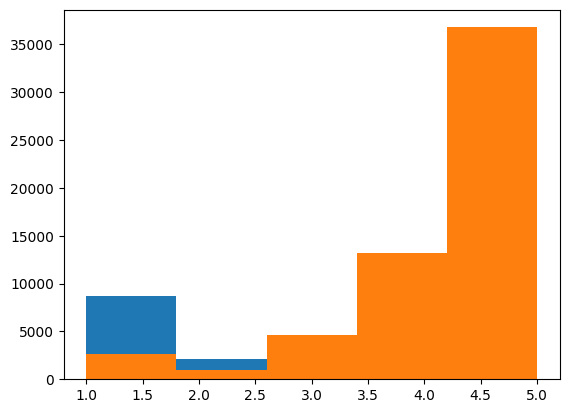

In [40]:
order_reviews_clean_df = pd.DataFrame()
order_reviews_clean_df['review_score'] = order_reviews_df['review_score'].fillna(order_reviews_df['review_score'].mean())
order_reviews_clean_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna(0)

order_reviews_clean_df[['review_score', 'review_comment_message']]

l = []
for i in order_reviews_clean_df['review_comment_message']:
    if i != 0:
        l.append(i)

order_reviews_clean_df[['review_score', 'review_comment_message']]

order_reviews_filtered_df = order_reviews_clean_df[order_reviews_clean_df['review_comment_message'] != 0]
print(order_reviews_filtered_df.head(15))
plt.hist(order_reviews_filtered_df['review_score'], bins=5)


order_noreviews_filtered_df = order_reviews_clean_df[order_reviews_clean_df['review_comment_message'] == 0]
print(order_noreviews_filtered_df.head(15))
plt.hist(order_noreviews_filtered_df['review_score'], bins=5)



In [ ]:
final_df['product_category_name'].shape

(8135,)

'\ncama_mesa_banho                  11270\nbeleza_saude                      9727\nesporte_lazer                     8700\nmoveis_decoracao                  8415\ninformatica_acessorios            7894\n'

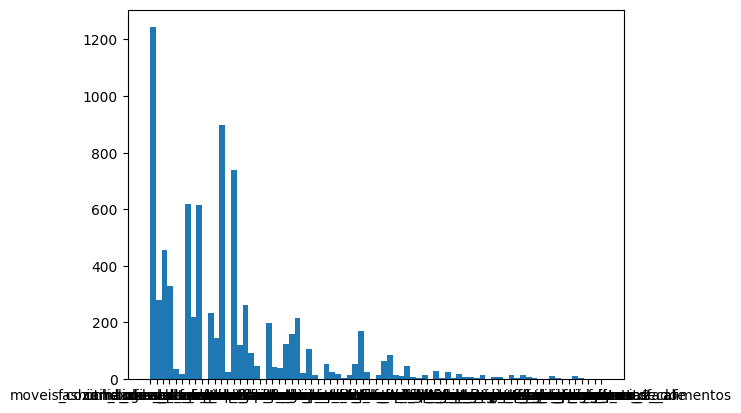

In [ ]:
list = []
for i in final_df['product_category_name']:
    if i != 0:
        list.append(i)
plt.hist(list, bins = 78)
plt.show

final_df['product_category_name'].value_counts()


"""
cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
"""